<a href="https://colab.research.google.com/github/Vngel0/Python_UC/blob/main/Clase_4_Flujos_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceptos de Machine Learning

Las próximas semanas estudiaremos distintas técnicas de Machine Learning. Esta clase, estudiaremos una serie de técnicas que son transversales para todos los procesos de creación y evaluación de un **modelo**

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

#Evitar avisos de deprecación entre otros.
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## Set de entrenamiento y prueba

Los algoritmos de machine learning se caracterizan por procesar un conjunto de datos, extraer patrones de ellos y luego extrapolar esos patrones a situaciones a las que no ha sido expuesto en el pasado. Para evaluar la efectividad de este proceso necesitamos simular esas dos etapas: entrenamiento y validación.
- En la etapa de entrenamiento usamos la mayoría de los datos (comunmente entre un 70%-90%) para definir el preprocesamiento necesario (imputar, escalar, features sintéticas, etc) y entrenar.
- En la etapa de validación usamos sobre la fracción restante de los datos los procedimientos de preprocesamiento definidos en la etapa anterior (de manera **ciega**). Luego realizamos las predicciones y comparamos los resultados obtenidos con el valor real.

`sklearn` Será una librería tan usada como `Pandas`, puesto que muchas herramientas de modelación se encuentran en ella. Utilizaremos una función específica para lo anteriormente expuesto llamada `train_test_split` que realizará una separación aleatoria en una fracción especificada.

In [2]:
df = pd.DataFrame(data=np.random.rand(10, 4), columns=list('ABCD'))
display(df)
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3)
display(df_train)
display(df_test)

,A,B,C,D
0,0.980677,0.303035,0.705003,0.025000
1,0.506153,0.533971,0.180610,0.044239
2,0.469149,0.971366,0.415836,0.645984
3,0.964103,0.685921,0.390341,0.315865
4,0.296932,0.145074,0.127898,0.498731
5,0.743674,0.388961,0.920327,0.899360
6,0.531974,0.431977,0.114315,0.153044
7,0.102548,0.217619,0.827890,0.624341
8,0.829811,0.134830,0.101846,0.047341
9,0.432115,0.997722,0.009019,0.467548


,A,B,C,D
8,0.829811,0.134830,0.101846,0.047341
2,0.469149,0.971366,0.415836,0.645984
5,0.743674,0.388961,0.920327,0.899360
0,0.980677,0.303035,0.705003,0.025000
1,0.506153,0.533971,0.180610,0.044239
6,0.531974,0.431977,0.114315,0.153044
4,0.296932,0.145074,0.127898,0.498731


,A,B,C,D
3,0.964103,0.685921,0.390341,0.315865
7,0.102548,0.217619,0.827890,0.624341
9,0.432115,0.997722,0.009019,0.467548



### Time based
Cuando los datos tienen una componente temporal, también existe la opción de separar los datos de acuerdo a una fecha de corte. Lo importante es asegurarse que los datos que dejemos en el set de prueba sean suficientes para validar.

In [3]:
df.index = pd.date_range('2020-08-01', periods=10)
display(df)

df_train = df[df.index <= '2020-08-06']
df_test = df[df.index > '2020-08-06']

display(df_train)
display(df_test)

,A,B,C,D
2020-08-01,0.980677,0.303035,0.705003,0.025000
2020-08-02,0.506153,0.533971,0.180610,0.044239
2020-08-03,0.469149,0.971366,0.415836,0.645984
2020-08-04,0.964103,0.685921,0.390341,0.315865
2020-08-05,0.296932,0.145074,0.127898,0.498731
2020-08-06,0.743674,0.388961,0.920327,0.899360
2020-08-07,0.531974,0.431977,0.114315,0.153044
2020-08-08,0.102548,0.217619,0.827890,0.624341
2020-08-09,0.829811,0.134830,0.101846,0.047341
2020-08-10,0.432115,0.997722,0.009019,0.467548


,A,B,C,D
2020-08-01,0.980677,0.303035,0.705003,0.025000
2020-08-02,0.506153,0.533971,0.180610,0.044239
2020-08-03,0.469149,0.971366,0.415836,0.645984
2020-08-04,0.964103,0.685921,0.390341,0.315865
2020-08-05,0.296932,0.145074,0.127898,0.498731
2020-08-06,0.743674,0.388961,0.920327,0.899360


,A,B,C,D
2020-08-07,0.531974,0.431977,0.114315,0.153044
2020-08-08,0.102548,0.217619,0.827890,0.624341
2020-08-09,0.829811,0.134830,0.101846,0.047341
2020-08-10,0.432115,0.997722,0.009019,0.467548




## Feature engineering

Los datos, tal y como son recolectados, rara vez están en un una forma efectiva para el aprendizaje del modelo. Además del proceso de limpieza normal de una base de datos, existe una serie de transformaciones que mejoran el performance de las predicciones.

### Scaling

Muchos algoritmos de Machine Learning se benefician de que las features de entrada tengan valores de tamaño similar y que dichos valores no sean extremos. Dos transformaciones comunes son:
- Normalización: consiste en llevar todos los valores de una columna al rango [0, 1]. Para esto se aplica la transformación

$$
x = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

- Estandarización: consiste en transformar los datos de manera que estén centrados y relativamente concentrados en cero. Hacemos esto forzando que su media sea 0 y varianza 1 usando la siguiente transformación:
$$
x = \frac{x - \mu}{\sigma}
$$
En `scikit-learn` usamos



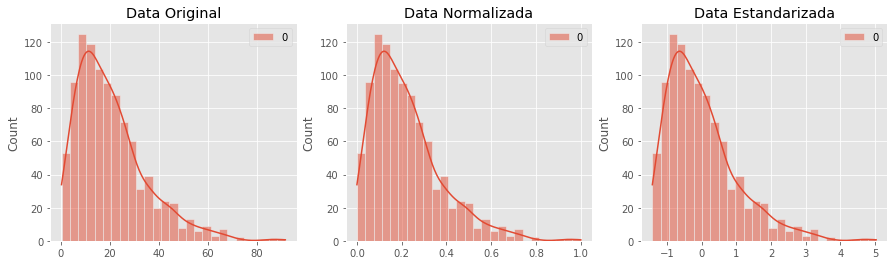

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15,4))

# Datos originales
x = np.random.gamma(shape=2, scale=10, size=(1000, 1))
sns.histplot(x, ax=ax[0],kde=True)
ax[0].set_title('Data Original')

# Datos transformados

from sklearn.preprocessing import MinMaxScaler
x_norm = MinMaxScaler().fit_transform(x)
sns.histplot(x_norm, ax=ax[1],kde=True)
ax[1].set_title('Data Normalizada')

from sklearn.preprocessing import StandardScaler
x_stand = StandardScaler().fit_transform(x)
sns.histplot(x_stand, ax=ax[2],kde=True)
ax[2].set_title('Data Estandarizada');



### One hot encoding o variables dummy
Los algoritmos de Machine Learning, en la práctica, son operaciones matemáticas y como tales operan sobre números. Qué pasa cuando tenemos una variable como `ciudad` en el conjunto de datos? Tenemos que encontrar una estrategia para representar dichos *conceptos* como números. En general, esas estrategias se llaman embeddings y cumplen un rol extremadamente importante en aplicaciones de Procesamiento de Lenguaje Natural. En nuestro caso, usaremos la alternativa mas sencilla, llamada One-Hot Encoding o variables dummy. Consiste en representar una variable con N categorías como N vectores, cuyas coordenadas son todas cero salvo una, que identifica a qué categoría pertenece.



In [ ]:
ciudades = pd.DataFrame(np.random.choice(['Santiago', 'Coquimbo', 'Temuco'], size=10), columns=['Ciudad'])
display(ciudades)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
pd.DataFrame(ohe.fit_transform(ciudades), columns=ohe.get_feature_names())

,Ciudad
0,Santiago
1,Coquimbo
2,Coquimbo
3,Santiago
4,Coquimbo
5,Coquimbo
6,Coquimbo
7,Santiago
8,Temuco
9,Santiago


,x0_Coquimbo,x0_Santiago,x0_Temuco
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0




## Entrenamiento, predicción y validación
Un flujo de trabajo normal para un proyecto de machine learning tiene muchas etapas, por ejemplo ingesta y limpieza de datos, feature engineering, optimización de hiperparámetros, serving, monitoreo y reentrenamiento. Sin embargo en el corazón de este proceso está el **entrenamiento**, **validación** y **predicción**

### Entrenamiento
En esta etapa usamos un conjunto de datos para que el modelo aprenda los patrones necesarios para completar la tarea. Dependiendo si estamos trabajando con un problema supervisado o no, le entregamos al modelo un conjunto de features y la target segun corresponda. Normalmente en todos los frameworks de Machine Learning esto se logra mediante el método `fit`.

Con la ayuda del comando `make_classification`, generemos una data de prueba para visualizar el flujo de trabajo, entrenaremos un modelo de regresión logística (ya visto en clases anteriores) y lo validaremos. Esta función permite generar un problema aleatorio de n clases, a diferencia de `train_test_split` el cual divide data existente, y es el que utilizariamos con data real:


Variables independientes:



array([[-1.85572313,  1.43221634],
       [-1.94896628,  1.12828913],
       [-0.75934867, -0.29265799],
       [ 1.3152719 ,  0.29490409],
       [ 1.93019668,  1.84216989]])


Variable dependiente:



array([0, 0, 0, 1, 1])

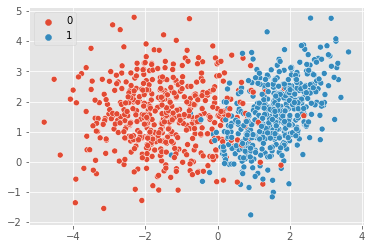

In [ ]:
#Creemos datos de prueba
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2, 
    n_redundant=0, 
    class_sep=1.5, 
    n_clusters_per_class=1,
    random_state=13,)

print('Variables independientes:\n')
display(X[0:5])
print('\nVariable dependiente:\n')
display(y[0:5])
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

In [ ]:
# Este es el proceso de dividir la muestra, en este caso el tamaño del set de testeo es 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Importamos la libreria del modelo y lo inicializamos
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# Ajustamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression()



Felicitaciones! ya tienen su primer modelo de machine learning entrenado
## Validación
Una vez entrenado el modelo, necesitamos medir qué tan bien esta haciendo su trabajo, para esto se utiliza una serie de métricas que veremos durante la clase. Para este primer modelo de ejemplo, utilizaremos de la librería `sklearn` el método `score` que calcula el `accuracy` (precisión) de la predicción.



In [ ]:
model.score(X_test, y_test)

0.94



## Predicción
Una vez finalizado el modelo, usamos el método `predict` para obtener las predicciones correspondientes sobre data nueva. 


In [ ]:
X_pred = X_test
y_pred = model.predict(X_pred)

predicciones = pd.DataFrame({'x1': X_pred[:, 0], 'x2': X_pred[:, 1], 'y_pred': y_pred, 'y_test': y_test})

In [ ]:
predicciones.head(10)

,x1,x2,y_pred,y_test
0,0.861951,0.634037,1,1
1,1.609847,2.181406,1,1
2,-0.443245,2.944940,0,0
3,-3.162675,1.243581,0,0
4,2.090505,1.920859,1,1
5,1.794879,0.577163,1,1
6,-2.427654,1.207703,0,0
7,-0.488137,1.525926,0,0
8,2.164269,2.749402,1,1
9,-2.900078,1.608689,0,0


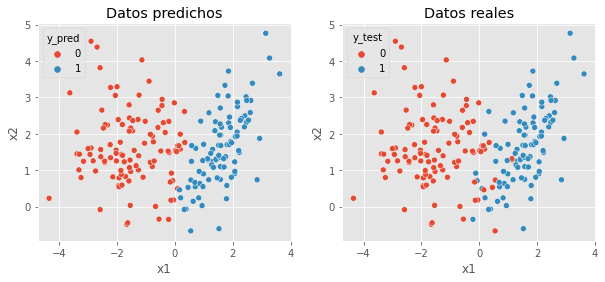

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

plt.subplot(1, 2, 1)
sns.scatterplot(x=predicciones.x1, y=predicciones.x2, hue=predicciones.y_pred)
plt.title('Datos predichos');

plt.subplot(1, 2, 2)
sns.scatterplot(x=predicciones.x1, y=predicciones.x2, hue=predicciones.y_test)
plt.title('Datos reales');

# Métricas de desempeño

Como vimos anteriormente, podemos comparar lo que nuestro modelo ha predicho vs lo que nuestro modelo debió predecir. Para comparar estos resultados existen distintos tipos de métricas y estas dependen de si nuestra variable a predecir es continua (para un modelo como una regresión lineal) o discreta (como una regresión logística)

### Matriz de confusión
En el caso de algoritmos de clasificación binaria, podemos construir la llamada matriz de confusión, esta cuantifica las siguientes cantidades para las predicciones sobre el set de prueba
- Verdaderos Positivos: Predicciones positivas correctas
- Verdaderos Negativas: Predicciones negativas correctas
- Falsos Positivos: Predicciones positivas incorrectas
- Falsos Negativos: Predicciones negativas incorrectas
Podemos crear un gráfico de la matriz de confusión como sigue:



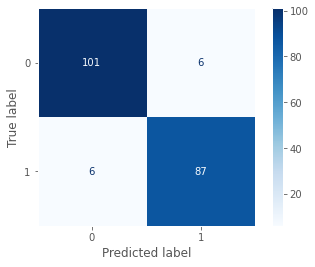

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cm_display.plot(cmap='Blues');
plt.grid(None);

In [ ]:
# Podemos obtener la misma matriz para una visualización rapida sin fines de presentación con pd.crosstab
m1_conf_pd = pd.crosstab(y_test, y_pred)
m1_conf_pd

col_0,0,1
row_0,,
0,101,6
1,6,87


De la tabla anterior, podemos encontrar distintos cálculos usados como métricas de desemepeño:

     * Accuracy (Exactitud)

La Accuracy es el numero de registros correctamente predichos sobre el numero total de datos. Formalmente es

$$\frac{\text{Verdadero Positivo + Verdadero Negativo}}{\text{Verdadero Positivo + Verdadero Negativo + Falso Positivo + Falso Negativo }}$$

Esto en Python lo podemos calcular rápidamente con `accuracy_score` de la libreria `sklearn.metrics`

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

#Notemos que es justo el score que sacamos antes!

0.94

Otros cálculos de desempeño son

     * Precision (precisión)
     
Mide la fracción de predicciones correctas entre las etiquetas positivas.  

$$\frac{\text{Verdadero Positivo}}{\text{Verdadero Positivo + Falso Positivo}}$$

     * Recall (sensibilidad)
     
Mide la fracción de verdaderos positivos predichos por el modelo

$$\frac{\text{Verdadero Positivo}}{\text{Verdadero Positivo + Falso Negativo }}$$

In [ ]:
from sklearn.metrics import precision_score, recall_score
m1_prec = precision_score(y_test, y_pred)
m1_rec = recall_score(y_test, y_pred)
print("Precision: ", m1_prec, "\nRecall: ", m1_rec)

Precision:  0.9354838709677419 
Recall:  0.9354838709677419


Existe un trueque entre Precision y Recall, en la medida que ambos puntajes se pueden promediar para obtener una medida ponderada de ambos fenómenos. Esta medida se conoce como F1, y representa la media armónica entre Precision y Recall. Se prefiere la media armónica dado que penaliza de mayor manera los valores bajos

$$F1 = \frac{\text{2 x Precision x Recall}}{\text{Precision + Recall}}$$

Resulta que en el módulo metrics de sklearn presenta el método
classification_report que reporta las medidas de precisión, recall y f1 para cada
categoría en el modelo estimado

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       107
           1       0.94      0.94      0.94        93

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



# Receiving Operating Characteristics (Curva ROC)

Con Precision, Recall y F1 logramos caracterizar las tasas de predicción exitosa del modelo, sin embargo un buen modelo de clasificación también debe considerar cuál es el rango de errores en el
modelo con el que se trabaja. Para ello utilizamos la curva ROC, que evalúa la relación entre ambos errores condicional en todo el rango del
clasificador.


El gráfico tienen las siguientes convenciones:
1. En el eje Y va la tasa de falsos positivos, aquella que resume las falsas alarmas en
nuestro modelo clasificador.
2. En el eje X va la tasa de verdaderos positivos, aquella que resume las observaciones
correctamente clasificadas por nuestro modelo.
3. La línea bisectriz representa el benchmark predictivo del modelo: esto es lo que
esperamos si es que un clasificador asigna etiquetas de forma aleatoria, sin mayor
información ingresada por el sistema.

Para generar un gráfico de curva ROC con sklearn, utilizamos el método roc_curve dentro
del módulo metrics. El método devuelve tres objetos: Un array con la tasa de falsos
positivos, un array con la tasa de verdaderos positivos y un array con los umbrales de
decisión entre 0 y 1.

In [ ]:
model.predict_proba(X_test)[0:5, 1]

array([8.86377377e-01, 9.63606690e-01, 4.75895064e-02, 5.97471611e-05,
       9.91776069e-01])

In [ ]:
from sklearn.metrics import roc_curve
# reseteamamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
y_pred = model.predict_proba(X_test)[:, 1]
# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, y_pred)

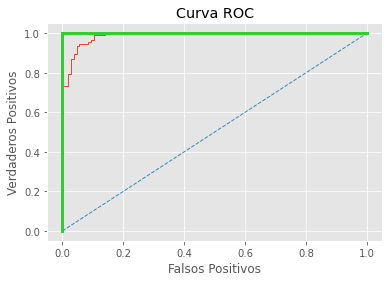

In [ ]:
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

Verán que es muy común (en especial en banca y consultoras) revisar el Area bajo la curva del modelo, que es un número que rápidamente nos indicará la calidad de este. Para esto lo calculamos de la siguiente manera:

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9876394332227916

# Diagnosticando un modelo

A continuación veremos algunos conceptos para entender el diagnostico que estamos calculando.

## Underfitting y Overfitting

Un modelo es exitoso cuando es capaz de igualar la complejidad del problema que está representando. Cuando proponemos un modelo muy sencillo para un problema muy complicado, no importa con cuantos datos alimentemos el modelo, nunca logrará ajustarse. Este escenario es conocido como **underfitting** y ocurre cuando nuestro modelo no es tan complejo como nuestro problema. El caso contrario, conocido como **overfitting** ocurre cuando nuestro modelo es mas complejo que nuestro problema. Esto permite que el modelo aprenda incluso el ruido presente en los datos y por lo tanto no pueda generalizar bien. En esta sección mostraremos como variar los hiperparámetros de un modelo para llevarlo desde underfitting hasta overfitting, pasando por el equilibrio ideal. 

## Cross Validation
Recordemos que entrenar y evaluar el modelo con el mismo conjunto de datos es un error metodológico, ya que nos arriesgamos a que el modelo **memorice** en vez de **aprender**. Atacamos este problema eligiendo un set de entrenamiento y uno de prueba.

Otro problema similar ocurre cuando buscamos el mejor conjunto de **hiperparámetros**. En términos simples, estos son valores que poseen los modelos que podemos cambiar, para obtener distintos resultados bajo los mismos modelos y la misma data. En las clases siguientes veremos algunos hiperparámetros para cada modelo.

La estrategia mas común para encontrar los mejores valores de un hiperparámetro es entrenar una serie de modelos, para distintos valores de hiperparámetros y elegir el que tiene mejores métricas. 

El problema surge cuando repetimos este proceso para el mismo set de entrenamiento y prueba. Existe el riesgo que terminemos eligiendo el mejor conjunto de hiperparámetros para una división específica de los datos. 

La solución a este problema se denomina **validación cruzada** y consiste en repetir el proceso de entrenamiento, para un mismo conjunto de hiperparámetros y distintas divisiones de entrenamiento y prueba. Cada entrenamiento produce una serie de métricas que podemos analizar como una muestra.

A continuación ejemplificaremos lo anterior con unos datos artificiales y un modelo de regresión lineal polinomial.

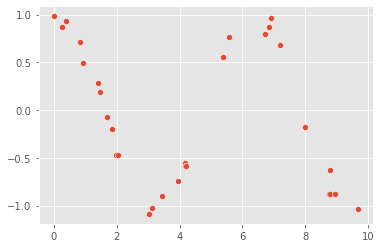

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

np.random.seed(1)

X = np.sort(np.random.rand(30)) * 10
y = np.cos(X) + np.random.normal(0, 0.1, size=30)

sns.scatterplot(X, y);

Usaremos como modelo una regresión lineal en conjunto con una técnica de feature engineering llamada **Polynomial Features**, que consiste en crear potencias de las variables originales. El grado de este polinomio es un hiperparámetro del modelo y ciertos valores produciran distintos resultados. Primero veamos solo el resultado con una regresión lineal.

Para poder visualizar la regresión, debemos pasar nuestro array X a formato columna con `[:, np.newaxis]`:

In [ ]:
X

array([1.14374817e-03, 2.73875932e-01, 3.90547832e-01, 8.50442114e-01,
       9.23385948e-01, 1.40386939e+00, 1.46755891e+00, 1.69830420e+00,
       1.86260211e+00, 1.98101489e+00, 2.04452250e+00, 3.02332573e+00,
       3.13424178e+00, 3.45560727e+00, 3.96767474e+00, 4.17022005e+00,
       4.17304802e+00, 4.19194514e+00, 5.38816734e+00, 5.58689828e+00,
       6.70467510e+00, 6.85219500e+00, 6.92322616e+00, 7.20324493e+00,
       8.00744569e+00, 8.76389152e+00, 8.78117436e+00, 8.78142503e+00,
       8.94606664e+00, 9.68261576e+00])

In [ ]:
X[:, np.newaxis]

array([[1.14374817e-03],
       [2.73875932e-01],
       [3.90547832e-01],
       [8.50442114e-01],
       [9.23385948e-01],
       [1.40386939e+00],
       [1.46755891e+00],
       [1.69830420e+00],
       [1.86260211e+00],
       [1.98101489e+00],
       [2.04452250e+00],
       [3.02332573e+00],
       [3.13424178e+00],
       [3.45560727e+00],
       [3.96767474e+00],
       [4.17022005e+00],
       [4.17304802e+00],
       [4.19194514e+00],
       [5.38816734e+00],
       [5.58689828e+00],
       [6.70467510e+00],
       [6.85219500e+00],
       [6.92322616e+00],
       [7.20324493e+00],
       [8.00744569e+00],
       [8.76389152e+00],
       [8.78117436e+00],
       [8.78142503e+00],
       [8.94606664e+00],
       [9.68261576e+00]])

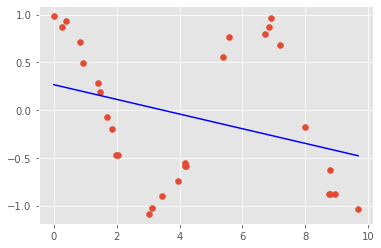

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X[:, np.newaxis], y) # es lo explicado anteriormente
y_pred = model.predict(X[:, np.newaxis])

plt.scatter(X[:, np.newaxis],y)
plt.plot(X, y_pred, color='blue')
plt.show()

Claramente la linea no es el mejor modelo, por lo que se aprecia un Under Fitting. Si calculamos sus medidas de error:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 =  r2_score(y, y_pred)

print('MSE: ', mse)
print('RMSE',rmse)
print('R^2: ',r2)

MSE:  0.4762947801516085
RMSE 0.6901411306041747
R^2:  0.10084284311225056


Polynomial Features nos permite recalcular nuestra información de manera polinomial. Es decir podemos aumentar la complejidad de nuestro modelo de $$Y = \theta_0 + \theta_1x$$ a $$Y = \theta_0 + \theta_1x + \theta_2x^2 $$ 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X[:, np.newaxis])
x_poly

array([[1.00000000e+00, 1.14374817e-03, 1.30815988e-06],
       [1.00000000e+00, 2.73875932e-01, 7.50080261e-02],
       [1.00000000e+00, 3.90547832e-01, 1.52527609e-01],
       [1.00000000e+00, 8.50442114e-01, 7.23251789e-01],
       [1.00000000e+00, 9.23385948e-01, 8.52641608e-01],
       [1.00000000e+00, 1.40386939e+00, 1.97084925e+00],
       [1.00000000e+00, 1.46755891e+00, 2.15372915e+00],
       [1.00000000e+00, 1.69830420e+00, 2.88423714e+00],
       [1.00000000e+00, 1.86260211e+00, 3.46928663e+00],
       [1.00000000e+00, 1.98101489e+00, 3.92442000e+00],
       [1.00000000e+00, 2.04452250e+00, 4.18007224e+00],
       [1.00000000e+00, 3.02332573e+00, 9.14049845e+00],
       [1.00000000e+00, 3.13424178e+00, 9.82347155e+00],
       [1.00000000e+00, 3.45560727e+00, 1.19412216e+01],
       [1.00000000e+00, 3.96767474e+00, 1.57424429e+01],
       [1.00000000e+00, 4.17022005e+00, 1.73907352e+01],
       [1.00000000e+00, 4.17304802e+00, 1.74143298e+01],
       [1.00000000e+00, 4.19194

Observemos que la primera columna solo son 1's, la segunda es el valor que teniamos y la tercera es igual a la segunda columna pero en grado 2

In [ ]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mse = mean_squared_error(y, y_poly_pred)
rmse = np.sqrt(mse)
r2 =  r2_score(y, y_poly_pred)

print('MSE: ', mse)
print('RMSE',rmse)
print('R^2: ',r2)

MSE:  0.470164061224474
RMSE 0.6856851035456976
R^2:  0.1124165156149084


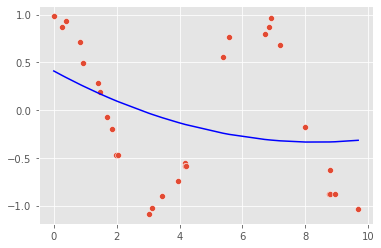

In [ ]:
sns.scatterplot(X, y);
sns.lineplot(X,y_poly_pred,color='blue');

Si bien el modelo posee mejores métricas, aun no es el mejor grado del polinomio que podemos asignar, por lo que para estos casos se utilizaremos la técnica de  **Validación cruzada** con el comando `cross_val_score`.

Esta nos permitirá ir probando distintos grados de polinomio y recibe una métrica de error para ir comparando, entregando como resultado el mejor modelo dada la métrica mencionada.

Adicional a esto introduciremos el concepto de **Pipeline**: Como hemos visto, tenemos que transformar la data cada vez que queramos probar un modelo. Si deseamos probar un grado 1, no hacemos transformación, luego para probar el modelo con grado 2, transformamos la data original como lo acabamos de hacer, pero para probar un nuevo grado, por ejemplo 3, es necesario volver a transformar la data original y volver a ajustar el modelo. Cuando se requiere hacer un ajuste a la data y aplicar un modelo muchas veces, el comando **pipeline** nos permite hacer esto de manera consecutiva y rápida.

En resumen: un pipeline es una serie de transfomaciones de `sklearn` y un modelo final. Una vez creado, el pipeline se entrena y usa para predecir como una unidad.

Primero veremos en acción `pipeline` y luego buscaremos el punto óptimo de nuestro polinomio con una `validación cruzada`

In [ ]:
from sklearn.pipeline import make_pipeline

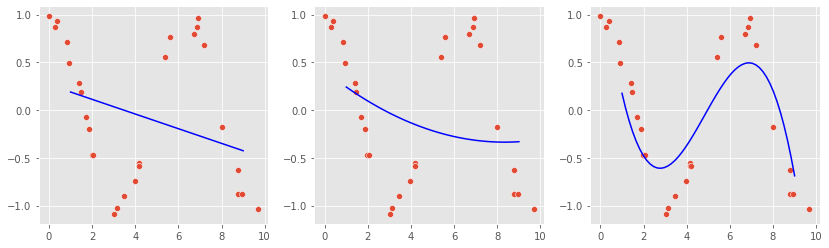

In [ ]:
degrees = [1, 2, 3]
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
x = np.linspace(1, 9)

for i, degree in enumerate(degrees):
    pipeline = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    pipeline.fit(X[:, np.newaxis], y)
    sns.scatterplot(X, y, ax=ax[i])
    sns.lineplot(x, pipeline.predict(x[:, np.newaxis]), ax=ax[i], color = "blue")

¡Perfecto!. Ahora en vez de evaluar visualmente nuestro modelo, y cometer el error de validar con el mismo set de entrenamiento,  calcularemos la métrica de error cuadrático medio para cada modelo, las compararemos todas y veremos cual es el mejor grado. Es decir, realizaremos la **validación cruzada**. 

Existen distintas técnicas de CV, pero por simplicidad utilizaremos solamente **K-Fold**, que es la estrategia por defecto. Consiste en dividir el dataset en $K$ subgrupos. En cada iteración, utiliza un subgrupo para probar y los restantes $K-1$ para entrenar.

In [ ]:
from sklearn.model_selection import cross_val_score

for degree in range(1, 10): #se probaran los grados del 1 al 10
    pipeline = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression()) #aplica la transformación
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, cv=10, scoring='neg_mean_squared_error') #data transformada a CV

In [ ]:
scores

array([-8.19931717e-01, -1.31732109e-02, -5.48930662e-03, -1.56861952e-02,
       -7.21097083e-03, -1.61048245e-03, -1.27504293e-02, -3.37384410e-02,
       -7.61306552e-02, -7.02582561e+00])

In [ ]:
print("El grado con menor error es: ",np.argmax(scores))
print("Con un error promedio de: ",-np.max(scores))

El grado con menor error es:  5
Con un error promedio de:  0.0016104824529223824


Podemos ver como evoluciona el comportamiento del modelo a medida que variamos un hiperparámetro usando un gráfico de validación

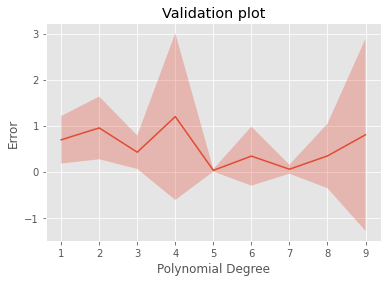

In [ ]:
means = []
stds = []
x = np.arange(1, 10)

for degree in range(1, 10):
    pipeline = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, cv=10, scoring='neg_mean_squared_error')
    means.append(-scores.mean())
    stds.append(scores.std())

means = np.array(means)
stds = np.array(stds)
plot = sns.lineplot(x, means)
plot.fill_between(x,means-stds, means+stds, alpha=0.3)
plot.set_xlabel('Polynomial Degree')
plot.set_ylabel('Error')
plot.set_title('Validation plot');

Otra forma de identificar estos problemas es comprarar el comportamiento del modelo en el set de entrenamiento vs prueba, recordando que:

- **Underfitting** se caracteriza por que ambas métricas no alcanzan un valor deseable
- **Overfitting** se caracteriza por presentar un gap entre el score de entrenamiento y prueba. El score de entrenamiento es bueno mientras que el de prueba se estanca o empeora
- **Ideal** Ambas métricas convergen a un valor deseable

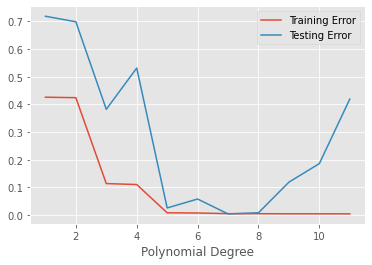

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []
x = np.arange(1, 12)

X_train, X_test, y_train, y_test = train_test_split(X[:, np.newaxis], y, test_size=0.2, random_state=2)

for degree in range(1, 12):
    pipeline = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    pipeline.fit(X_train, y_train)
    train_error = mean_squared_error(pipeline.predict(X_train), y_train)
    test_error = mean_squared_error(pipeline.predict(X_test), y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

train_errors = np.array(train_errors)
test_errors = np.array(test_errors)
plot = sns.lineplot(x, train_errors, label='Training Error')
plot = sns.lineplot(x, test_errors, label='Testing Error')
plot.set_xlabel('Polynomial Degree');

Lo mejor es un grado 7 u 8 para este problema utilizando test-train-split, sin embargo creiamos que era un grado 5 con CV. Si volvemos a graficar lo de más arriba pero con estos grados, observamos lo siguiente:

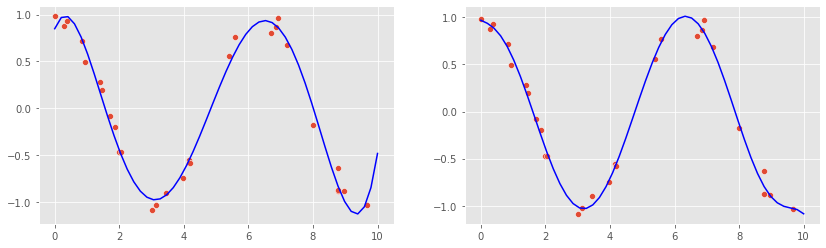

In [ ]:
degrees = [5, 7]
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
x = np.linspace(0, 10)

for i, degree in enumerate(degrees):
    pipeline = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    pipeline.fit(X[:, np.newaxis], y)
    sns.scatterplot(X, y, ax=ax[i])
    sns.lineplot(x, pipeline.predict(x[:, np.newaxis]), ax=ax[i], color = "blue")

¿Cuál hiperparámetro creen que es el mejor?

# Ejercicios

La base de datos Credit contiene datos de clientes de un banco e información sobre su situación financiera. Las variables son las siguientes:
    
    
- Income : Ingreso anual disponible en miles de dólares.
- Limit : Límite del crédito.
- Rating : Ranking del crédito.
- Cards : Cantidad de tarjetas de credito.
- Age : Edad del usuario.
- Education : Años de educación del usuario.
- Gender : ¿Hombre o mujer?
- Student : ¿Es estudiante?
- Married : ¿Está casado?
- Balance : Promedio de deuda en tarjeta de crédito de usuario.

- a)  Cargue los datos con la función read_csv de pandas. Utilice la función head para visualizar los datos cargados. ¿Existe alguna columna que no necesitemos? Elimínela de ser necesario, utilizando la función drop('nombre columna a eliminar', axis=1).
    
-  b) Determine qué variables de la  base de datos corresponden a categorías.

Realice la codificación en variables dummies para cada una de ellas siguiendo los siguientes pasos:  

        -b.1) Defina en un objeto llamado df_num todas las variables numéricas de la base de datos.
    
        -b.2) Recodifique todas las variables categóricas. Para recodificar una variable categórica con dos categorías puede utilizar la función de pandas get_dummies(prefix="prefijo de las columnas", drop_first=True) , drop_first elimina la primera columna.
    
        -b.3) Junte el objeto df.num con las columnas de las variables categóricas recodificadas utilizando la función de pandas concat([objeto1, objeto2, ...], axis=1), de modo que en un objeto df_new se encuentren todas las variables.
    
- c) Defina en un objeto X las variables predictoras y en un objeto Y la variable respuesta Balance, obtenga un split de los datos, con un porcentaje de datos de entrenamiento del 75%.
    
- d) Entrene un modelo de regresión lineal con los datos de entrenamiento, luego obtenga, para el set de validación, el MSE, RMSE y R2. ¿Cuáles de estas métricas nos sirven para evaluar la bondad de ajuste del modelo mismo?
    
-    e) Otra manera de implementar una regresión lineal en Python es utilizando la librería statsmodels, esta forma es mucho más similar a R:  

```
import statsmodels.api as sm

import statsmodels.formula.api as smf

smf.ols('y  ~ x1 + x2', data = pd.concat([y_train,X_train], axis=1)).fit()
```
Entrene el modelo de esa manera, y obtenga un `summary()`